# Srednjekvadratna aproksimacija

Tehnike srednjekvadratne aproksimacije ćemo demonstrirati kroz primere rešavanja preuslovljenih sistema. 

Za sistem jednačina $Ax = b$ kažemo da je `preuslovljen` ako je matrica $A$ dimenzije $m\times n$ i važi $m>n$. Rešenje ovakvog sistema se dobija kao rešenje optimizacionog problema $min_{x} \|A\cdot x - b\|^2$ kojim se minimizuje srednjekvadratna greška.


Analitičko rešenje sistema jednačina ima oblik $x=(A^{T}A)^{-1}A^{T}b$. Matricu $(A^{T}A)^{-1}A^{T}$ koja figuriše u ovom izrazu zovemo `pseudoinverzom` matrice $A$.

Za ocenu rešenja $x_{solution}$ sistema koristimo sumu kvadrata reziduala (engl. residual square sum, RSS). Suma kvadrata reziduala je vrednost $||A\cdot x_{solution} - b||^2$ i predstavljaj najmanju vrednost koja se može dobiti minimizacijom srednjekvadratne greške.

In [1]:
import numpy as np
from numpy import linalg as LA

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

### Primeri

**1.** Rešiti sistem jednačina dat u matričnom obliku $$\begin{bmatrix}2&0\\-1&1\\0&2\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}2\\0\\-2\end{bmatrix}.$$

Iz prve jednačine sledi da je $x_1 = 1$, iz poslednje $x_2 = -1$, a iz druge $x_1 = x_2$, što je kontradikcija, pa sistem nema rešenja. Rešavanje ovog sistema predstavlja nalaženje vrednosti $x_1$ i $x_2$ koja minimizuje grešku u smislu metode najmanjih kvadrata. 

In [4]:
A = np.array([[2,0], [-1,1], [0,2]])
b = np.array([2, 0, -2]).T

Ukoliko direktno primenimo formulu za rešavanje sistema dobićemo: 

In [5]:
x = LA.inv(A.T.dot(A)).dot(A.T).dot(b)
print('Resenje: x1 =', x[0], 'x2 =', x[1])

Resenje: x1 = 0.6666666666666667 x2 = -0.6666666666666667


Za računanje pseudoinverza matrice možemo koristiti i funkciju `pinv` paketa `linalg`.

In [6]:
A_pinv = LA.pinv(A)

In [7]:
A_pinv

array([[ 0.41666667, -0.16666667,  0.08333333],
       [ 0.08333333,  0.16666667,  0.41666667]])

Sada rešenje sistema možemo dobiti sa: 

In [8]:
x = A_pinv.dot(b)
print('Resenje: x1 =', x[0], 'x2 =', x[1])

Resenje: x1 = 0.6666666666666665 x2 = -0.666666666666667


Ocenu rešenja korišćenjem sume kvadrata reziduala možemo dobiti sa:

In [9]:
rss = LA.norm(b - A.dot(x)) ** 2
print('Suma kvadrata reziduala:', rss)

Suma kvadrata reziduala: 2.6666666666666665


Paket `linalg` stavlja na raspolaganje i funkciju `lstsq` koja objedinjuje prethnodne korake i rešava sistem jednačina u srednjekvadratnom smislu. Argumenti ove funkcije su matrica sistema `A` i vektor slobodnih članova `b`. Funkcija vraća rešenje sistema i sumu kvadrata reziduala u formi niza. Funkcija vraća i neke pomoćne vrednosti koje se tiču primene algoritma za rešavanje (rang matrice sistema i njene singularne vrednosti), a o kojima ćemo diskutovati kasnije na kursu.

In [10]:
x, rss, _, _ = LA.lstsq(A, b, rcond=None)

In [11]:
print('Resenje: x1 =', x[0], 'x2 =', x[1])

Resenje: x1 = 0.6666666666666665 x2 = -0.6666666666666669


In [12]:
print('Suma kvadrata reziduala:', rss[0])

Suma kvadrata reziduala: 2.666666666666666


**2.** Odrediti koeficijente $\beta_0$ i $\beta_1$ tako da funkcija $f(x) = \beta_0 + \beta_1 x$ u smislu metode najmanjih kvadrata najbolje aproksimira skup tačaka $(0, 1.2)$, $(0.5, 2.05)$, $(1, 2.9)$ i $(-0.5, 0.1)$ u ravni.

Neka su $(x_i, y_i)$, $1 \le i \le 4$ redom parovi tačaka. Nalaženje vrednosti koeficijenata predstavlja rešavanje sistema jednačina $A\beta = y$, gde je $A = \begin{bmatrix}1&x_1\\1&x_2\\1&x_3\\1&x_4\end{bmatrix}$, $\beta = \begin{bmatrix}\beta_0\\ \beta_1\end{bmatrix}$ i $y = \begin{bmatrix}y_1\\y_2\\y_3\\y_4\end{bmatrix}$. 


Zadatak će pored korišćenja funkcije `lstsq` biti rešen i eksplicitnim nalaženjem vrednosti koeficijenata. 

Prvo ćemo izdvojiti nizove vrednosti `x` i `y` zadatog skupa tačaka.

In [13]:
points = [(0, 1.2), (0.5, 2.05), (1, 2.9), (-0.5, 0.1)]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])
n = x.shape[0]

Potom ćemo kreirati matricu sistema:

In [14]:
A = np.vstack((np.ones(n), x)).T

In [15]:
A

array([[ 1. ,  0. ],
       [ 1. ,  0.5],
       [ 1. ,  1. ],
       [ 1. , -0.5]])

Rešenje sistema i ocenu greške možemo dobiti sa:

In [16]:
beta, rss, _, _ = LA.lstsq(A, y.T, rcond=None)

In [17]:
print('Resenje: ', beta)

Resenje:  [1.1  1.85]


In [18]:
print ('RSS ocena: ', rss[0])

RSS ocena:  0.018750000000000037


Do rešenja optimizacionog problema $min_{\beta} \|y - A\cdot \beta\|^2$ tj. problema $min_{\beta_0, \beta_1}\|y - (\beta_0+\beta_1x)\|$  se može doći i računanjem parcijalnih izvoda po $\beta_0$ i $\beta_1$ i njihovim izjedanačavanjem sa nulom.  

Time se dobijaju formule 

$$\beta_1 = \frac{\sum_{i=1}^{n}{(x_i-\overline{x})(y_i-\overline{y})}}{\sum_{i=1}^{n}{(x_i-\overline{x})^2}}$$ i
$$\beta_0 = \overline{y}-\beta_1\overline{x}$$ u kojima su $\overline{x}$ i $\overline{y}$ srednje vrednosti vektora $x$ i $y$.

In [19]:
beta1 = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean()) ** 2)
beta0 = y.mean() - beta1 * x.mean()

Ovako dobijena rešenja su: 

In [20]:
print("Resenje: ", beta0, beta1)

Resenje:  1.1 1.8499999999999996


**3.** Odrediti koeficijente $a$, $b$ i $c$ funkcije $f(x,y) = a + b x + c y$ tako da u smislu metode najmanjih kvadrata aproksimira skup tačaka $(3, 3, -1)$, $(5, 3, 1)$ i $(3, 4, 2)$ u prostoru.

Neka su $(x_i, y_i, z_i)$, $1 \le i \le 3$ redom parovi tačaka. Nalaženje vrednosti koeficijenata predstavlja rešavanje sistema jednačina $A\beta = z$, gde je $A = \begin{bmatrix}1&x_1&y_1\\1&x_2&y_2\\1&x_3&y_3\end{bmatrix}$, $\beta = \begin{bmatrix}a\\ b\\ c\end{bmatrix}$ i $z = \begin{bmatrix}z_1\\z_2\\z_3\end{bmatrix}$.

In [21]:
points = [(3,3,-1), (5,3,1), (3,4,2)]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])
z = np.array([p[2] for p in points])
n = x.shape[0]

In [22]:
A = np.vstack((np.ones(n), x, y)).T

In [23]:
solution, rss, _, _ = LA.lstsq(A, z.T, rcond=None)

In [24]:
a, b, c = solution

In [25]:
print('Resenje sistema: ', a, b, c)

Resenje sistema:  -12.999999999999982 0.9999999999999982 3.0


**4.** Odrediti vrednosti koeficijenata $a$ i $b$ tako da funkcija $f(x) = a + b \sin x$ u smislu metode najmanjih kvadrata aproksimira skup tačaka $(2, 2.6)$, $(-1.22, -1.7)$, $(8.32, 2.5)$ i $(4.23, -1.6)$ u ravni. Dati ocenu greške. Prikazati skup tačaka i nacrtati rezultujuću funkciju.

Neka su $(x_i, y_i)$, $1 \le i \le 4$ redom parovi tačaka. Nalaženje vrednosti koeficijenata predstavlja rešavanje sistema jednačina $A\beta = y$, gde je $A = \begin{bmatrix}1&\sin x_1\\1&\sin x_2\\1&\sin x_3\\1&\sin x_4\end{bmatrix}$, $\beta = \begin{bmatrix}a\\ b\end{bmatrix}$ i $y = \begin{bmatrix}y_1\\y_2\\y_3\\y_4\end{bmatrix}$.

In [26]:
points = [(2, 2.6), (-1.22, -1.7), (8.32, 2.5), (4.23, -1.6)]
x = np.array([p[0] for p in points])
y = np.array([p[1] for p in points])
n = x.shape[0]

In [27]:
A = np.vstack([np.ones(n), np.sin(x)]).T

In [28]:
solution, rss, _, _ = LA.lstsq(A, y.T, rcond=None)

In [29]:
a, b = solution
print('Resenje sistema: ', a, b)

Resenje sistema:  0.4629244420449795 2.315513480740615


In [30]:
rss = rss[0]
print('RSS ocena: ', rss)

RSS ocena:  0.0022605727583821017


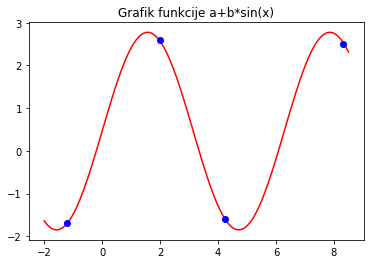

In [31]:
t_points = np.linspace(-2, 8.5, 100)
t_values = a + b * np.sin(t_points)
plt.plot(t_points, t_values, color='red')
plt.plot(x, y, 'o', color='blue')
plt.title('Grafik funkcije a+b*sin(x)')
plt.show()

**5.** U datoteci *social_reach.csv* se nalaze cene reklamiranja za različite demografske grupe koje su date u hiljadama evra za 1000 pregleda. Svaka od tri kolone označava različitu platformu za reklamiranje (na primer, platforme mogu biti Facebook, Instagram ili YouTube). Svaki red označava različitu demografsku grupu, koja može npr. biti posebna država u kojoj se reklama plasira. Potrebno je odrediti iznos sredstava potreban da se ostvari približno milion pregleda za svaku demografsku grupu, gledajući po svim platformama ukupno.

Najpre ćemo učitati i prikazati CSV fajl:

In [32]:
data = pd.read_csv('data/social_reach.csv')

In [33]:
data

,web1,web2,web3
0,0.97,1.86,0.41
1,1.23,2.18,0.53
2,0.80,1.24,0.62
3,1.29,0.98,0.51
4,1.10,1.23,0.69
5,0.67,0.34,0.54
6,0.87,0.26,0.62
7,1.10,0.16,0.48
8,1.92,0.22,0.71
9,1.29,0.12,0.62


Neka je $a_{ij}$, $0 \le i \le 9$, $0 \le j \le 2$ cena u hiljadama evra za 1000 pregleda za svaku od 10 demografskih grupa i svaku platformu za reklamiranje. Kako je potrebno odrediti ukupne cene za reklamiranje, potrebno je rešiti sledeći sistem jednačina:

$$\begin{bmatrix}a_{00}&a_{01}&a_{02}\\a_{10}&a_{11}&a_{12}\\ \vdots & \vdots & \vdots\\a_{90}&a_{91}&a_{92}\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix} = \begin{bmatrix}1000\\1000\\\vdots\\1000\end{bmatrix}.$$

Elementi rezultujućeg vektora su 1000, jer su cene u matrici date za 1000 pregleda, a potrebno je ostvariti milion pregleda. Za svaku demografsku grupu $i$, potrebno je odrediti koeficijente $x_1,x_2,x_3$ tako da važi $a_{i0}x_1+a_{i1}x_2+a_{i2}x_3 \approx 1000$, pa se koeficijenti mogu približno odrediti metodom najmanjih kvadrata.

In [34]:
n = data.shape[0]

In [35]:
A = data[['web1', 'web2', 'web3']]
b = 1000 * np.ones(n).T

In [36]:
solution, rss, _, _ = LA.lstsq(A, b, rcond=None)

In [37]:
solution

array([  62.07662454,   99.98500403, 1442.83746254])

In [38]:
investment = A.dot(solution)

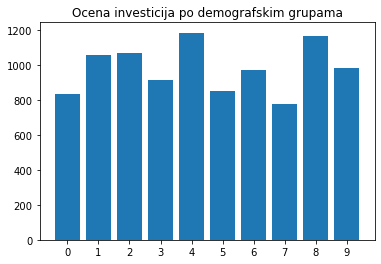

In [39]:
plt.xticks(np.linspace(0, n-1, n))
plt.bar(A.index, investment)
plt.title('Ocena investicija po demografskim grupama')
plt.show()

Na prethodnom grafiku je prikazan ukupan broj u hiljadama pregleda za svaku demografsku grupu. Ukupna cena koja je plaćena za demografsku grupu $i$ iznosi $a_{i0}x_1+a_{i1}x_2+a_{i2}x_3$ hiljada dolara, gde su vrednosti koordinata vektora $x$ jednake:

In [40]:
print('x1 =', solution[0])
print('x2 =', solution[1])
print('x3 =', solution[2])

x1 = 62.07662454385008
x2 = 99.98500402826238
x3 = 1442.8374625412225
